## 영단어 키워드 분석

### 패키지 설치

In [ ]:
# wordcloud 패키지 설치
!pip install wordcloud

: 

In [ ]:
# 자연어처리 패키지 설치
!pip install nltk

#### 패키지 import

In [2]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [ ]:
nltk.download()
import nltk

#### NLTK 리소스를 최초 한번 다운로드
 
 -다른 팝업 창 필요한 것들 다운로드

In [3]:
# 파일병합
all_files = glob.glob('./myCabinetExcelData*.xls')
all_files

['.\\myCabinetExcelData (1).xls',
 '.\\myCabinetExcelData (2).xls',
 '.\\myCabinetExcelData (3).xls',
 '.\\myCabinetExcelData (4).xls',
 '.\\myCabinetExcelData (5).xls']

In [ ]:
!pip install xlrd

In [4]:
all_data = []
for file in all_files:
    df = pd.read_excel(file)
    all_data.append(df)

all_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
2,NaN,3,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
3,NaN,4,Big Scholarly Data: A Survey,"Xia, F.; Wang, W.; Bekele, T. M.; Liu, H.",unknown,2017
4,NaN,5,Big-BOE: Fusing Spanish Official Gazette with ...,"Basanta-Val, P.; Sánchez-Fernández, L.",Mary Ann Leibert,2018
...,...,...,...,...,...,...
95,NaN,96,Artificial Bee Colony Reinforced Extended Kalm...,"Raghav, R. Srinivasa; Thirugnanasambandam, Kal...",Mary Ann Leibert,2022
96,NaN,97,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
97,NaN,98,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014
98,NaN,99,Curating Big Data Made Simple: Perspectives fr...,unknown,Mary Ann Leibert,2014


In [5]:
all_data_concat = pd.concat(all_data, axis=0, ignore_index=True)

In [6]:
all_data_concat.to_csv('./riss_bigdata.csv', index= False, encoding='utf-8')

In [7]:
### 데이터전처리
all_data_concat['제목']

0            Architecting Time-Critical Big-Data Systems
1      Computation migration: a new approach to execu...
2      A trust-based crowdfunding campaign marketing ...
3                           Big Scholarly Data: A Survey
4      Big-BOE: Fusing Spanish Official Gazette with ...
                             ...                        
495    Political Depression? A Big-Data, Multimethod ...
496    Framework for Aligning Big-Data Strategy with ...
497    Mobile Edge Computing for Big-Data-Enabled Ele...
498    »The Human Project«: Big-Data-Studie startet i...
499    New Pattern of Lifecycle Big-Data-Driven Smart...
Name: 제목, Length: 500, dtype: object

In [8]:
all_title = all_data_concat['제목']
all_title

0            Architecting Time-Critical Big-Data Systems
1      Computation migration: a new approach to execu...
2      A trust-based crowdfunding campaign marketing ...
3                           Big Scholarly Data: A Survey
4      Big-BOE: Fusing Spanish Official Gazette with ...
                             ...                        
495    Political Depression? A Big-Data, Multimethod ...
496    Framework for Aligning Big-Data Strategy with ...
497    Mobile Edge Computing for Big-Data-Enabled Ele...
498    »The Human Project«: Big-Data-Studie startet i...
499    New Pattern of Lifecycle Big-Data-Driven Smart...
Name: 제목, Length: 500, dtype: object

In [9]:
all_data_concat = all_data_concat.drop(all_data_concat.columns[[0]], axis='columns')
all_data_concat

,번호,제목,저자,출판사,출판일
0,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,2,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
2,3,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
3,4,Big Scholarly Data: A Survey,"Xia, F.; Wang, W.; Bekele, T. M.; Liu, H.",unknown,2017
4,5,Big-BOE: Fusing Spanish Official Gazette with ...,"Basanta-Val, P.; Sánchez-Fernández, L.",Mary Ann Leibert,2018
...,...,...,...,...,...
495,96,"Political Depression? A Big-Data, Multimethod ...","Simchon, Almog; Guntuku, Sharath Chandra; Simh...",APA AMERICAN PSYCHOLOGICAL ASSOCIATION,2020
496,97,Framework for Aligning Big-Data Strategy with ...,"Lakoju, Mike; Serrano, Alan","Curran Associates,.",2017
497,98,Mobile Edge Computing for Big-Data-Enabled Ele...,"Cao, Y.; Song, H.; Kaiwartya, O.; Zhou, B.; Zh...",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2018
498,99,»The Human Project«: Big-Data-Studie startet i...,unknown,GOVI VERLAG GMBH,2017


In [15]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()



In [16]:
words = []

for title in all_title:
    EnWords = re.sub(r'^[^a-zA-Z]+', ' ', str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]

    words.append(EnWordsTokenStopLemma)

In [18]:
print(words) #불용어 제거 남은 키워드 단어만 남음

[['architecting', 'time-critical', 'big-data', 'system'], ['computation', 'migration', ':', 'new', 'approach', 'execute', 'big-data', 'bioinformatics', 'workflow'], ['trust-based', 'crowdfunding', 'campaign', 'marketing', 'framework', ':', 'theoretical', 'underpinnings', 'big-data', 'analytics', 'practice'], ['big', 'scholarly', 'data', ':', 'survey'], ['big-boe', ':', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology'], ['sport', 'analytics', 'era', 'big', 'data', ':', 'moving', 'toward', 'next', 'frontier'], ['big', 'data', ':', 'new', 'method', 'idea', 'geological', 'scientific', 'research'], ['call', 'special', 'issue', 'paper', ':', 'big', 'data-driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation'], ['mapping', 'essential', 'urban', 'land', 'use', 'category', '(', 'euluc', ')', 'using', 'geospatial', 'big', 'data', ':', 'progress', ',', 'challenge', ',', 'opportunity'], ['scalable', 'data', 'quality', 'big', 'data', ':', 'pythia',

In [19]:
words_reduce = list(reduce(lambda x, y: x+y, words))  # 1차원 리스트로 변환
print(words_reduce)

['architecting', 'time-critical', 'big-data', 'system', 'computation', 'migration', ':', 'new', 'approach', 'execute', 'big-data', 'bioinformatics', 'workflow', 'trust-based', 'crowdfunding', 'campaign', 'marketing', 'framework', ':', 'theoretical', 'underpinnings', 'big-data', 'analytics', 'practice', 'big', 'scholarly', 'data', ':', 'survey', 'big-boe', ':', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology', 'sport', 'analytics', 'era', 'big', 'data', ':', 'moving', 'toward', 'next', 'frontier', 'big', 'data', ':', 'new', 'method', 'idea', 'geological', 'scientific', 'research', 'call', 'special', 'issue', 'paper', ':', 'big', 'data-driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation', 'mapping', 'essential', 'urban', 'land', 'use', 'category', '(', 'euluc', ')', 'using', 'geospatial', 'big', 'data', ':', 'progress', ',', 'challenge', ',', 'opportunity', 'scalable', 'data', 'quality', 'big', 'data', ':', 'pythia', 'framework', 'hand

In [20]:
count = Counter(words_reduce)
count

Counter({'architecting': 1,
         'time-critical': 1,
         'big-data': 115,
         'system': 35,
         'computation': 2,
         'migration': 1,
         ':': 210,
         'new': 15,
         'approach': 32,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 2,
         'trust-based': 1,
         'crowdfunding': 1,
         'campaign': 1,
         'marketing': 1,
         'framework': 26,
         'theoretical': 3,
         'underpinnings': 1,
         'analytics': 83,
         'practice': 3,
         'big': 359,
         'scholarly': 3,
         'data': 386,
         'survey': 11,
         'big-boe': 1,
         'fusing': 1,
         'spanish': 1,
         'official': 1,
         'gazette': 1,
         'technology': 8,
         'sport': 3,
         'era': 7,
         'moving': 3,
         'toward': 5,
         'next': 2,
         'frontier': 3,
         'method': 13,
         'idea': 1,
         'geological': 1,
         'scientific': 8,
         '

In [40]:
word_count = dict()

for tag, counts in count.most_common(30):
    if len(str(tag)) > 1:
        word_count[tag] = counts
        #print(f'{tag} : {counts}')

word_count


{'data': 386,
 'big': 359,
 'big-data': 115,
 'analytics': 83,
 'analysis': 40,
 'issue': 36,
 'system': 35,
 'approach': 32,
 'special': 32,
 'call': 29,
 'using': 29,
 'paper': 28,
 'framework': 26,
 'model': 26,
 'application': 23,
 'earth': 22,
 'learning': 21,
 'platform': 19,
 'based': 19,
 'processing': 18,
 'science': 17,
 'cloud': 17,
 'distributed': 16,
 'computing': 16,
 'perspective': 16,
 'new': 15}

#### 단어개수 차트

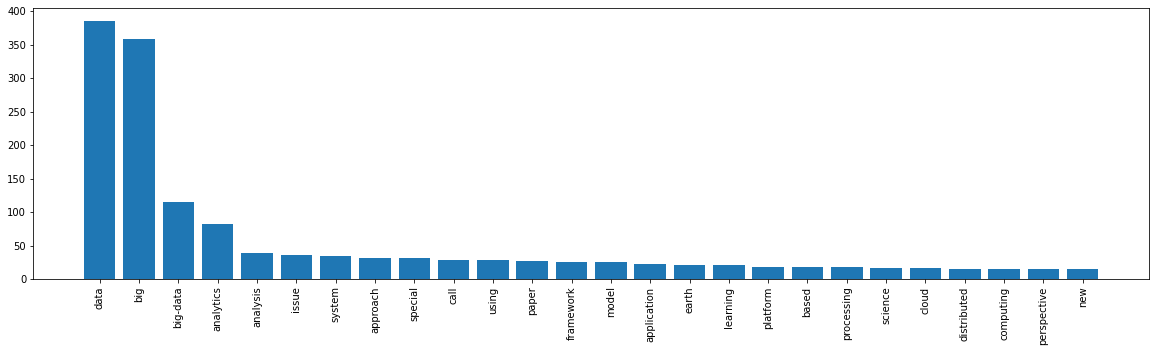

In [41]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.figure(figsize = (20,5))
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '90')
plt.show()

#### 결과 시각화

In [42]:
all_data_concat['doc_count'] = 0
summary_year = all_data_concat.groupby('출판일',  as_index = False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1999,1
1,2004,1
2,2011,1
3,2012,8
4,2013,12
5,2014,44
6,2015,43
7,2016,73
8,2017,78
9,2018,67


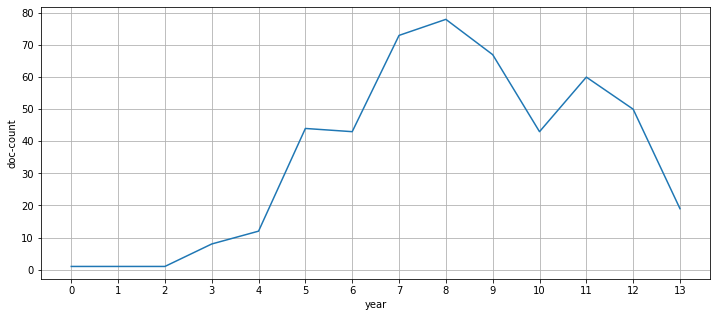

In [45]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year))), [text for text in summary_year['출판일']]
plt.show()


#### 워드클라우드

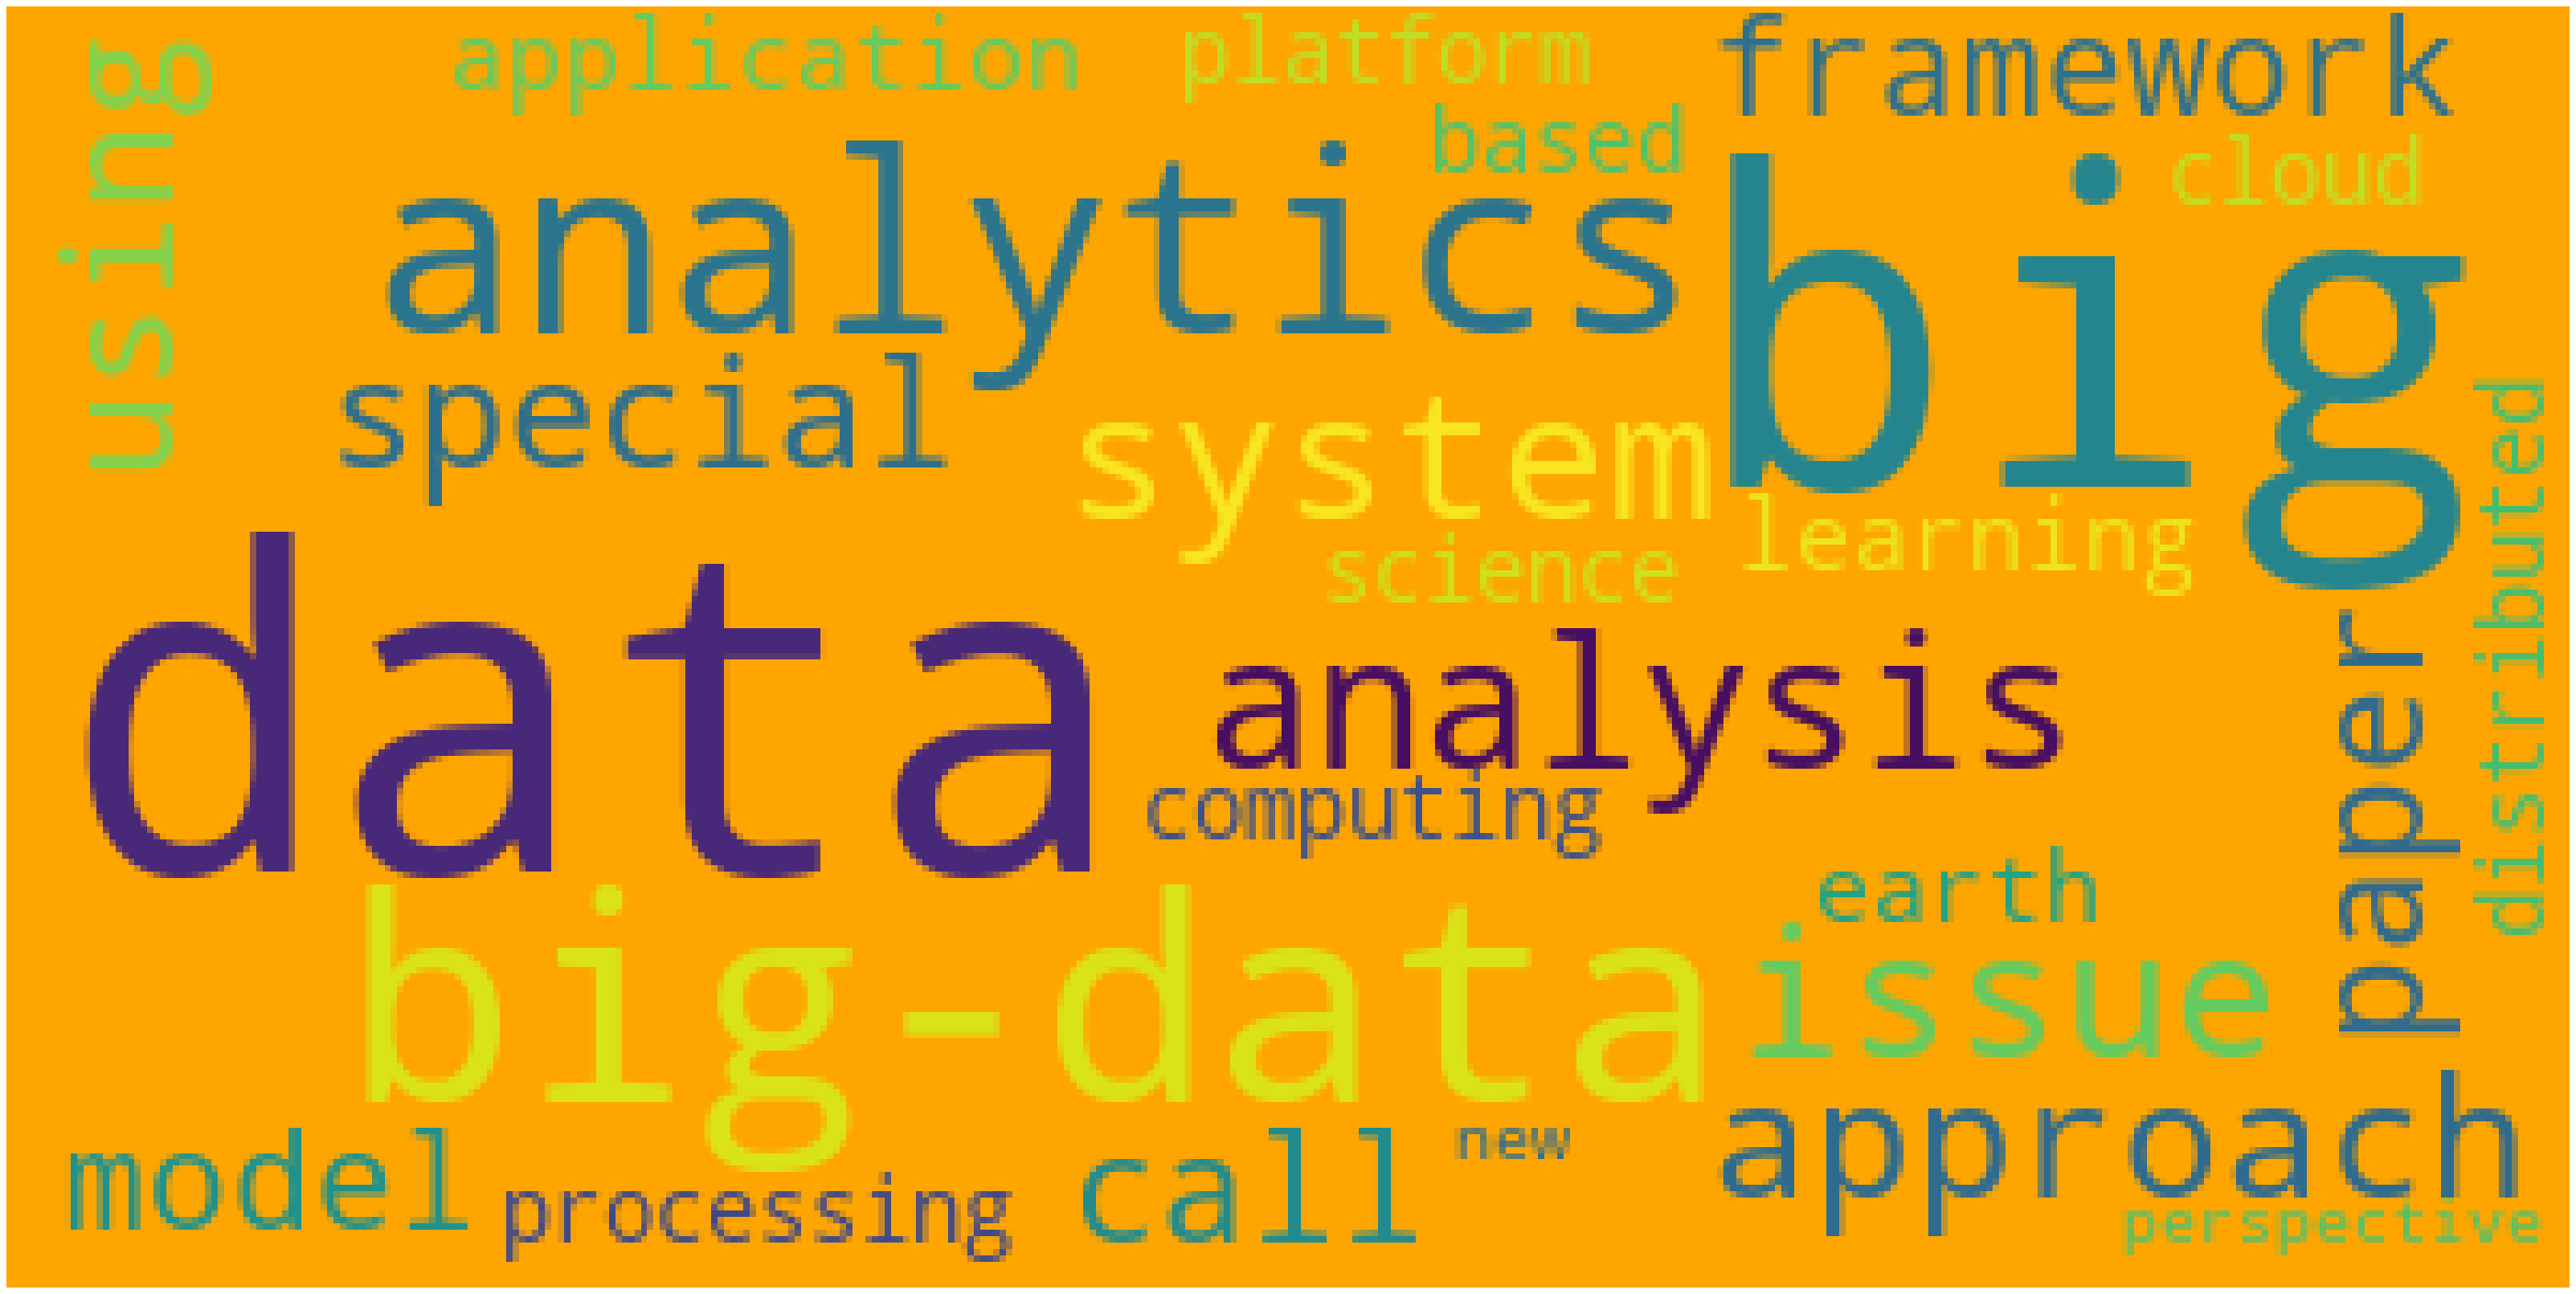

In [58]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'orange', stopwords=stopwords)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(50,30))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [59]:
cloud.to_file('./riss_bigdata_wordcloud.png')